<a href="https://colab.research.google.com/github/ale-camer/Data-Science/blob/Finance/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an image classification project in which we use the MNIST dataset which is a large database of handwritten digits.

To train this dataset we use a simple CNN architecture. Nothing fancy like transfer learning or data augmentation.

## Libraries and Data

Number of classes:  10

Classes names:  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Classes examples: 


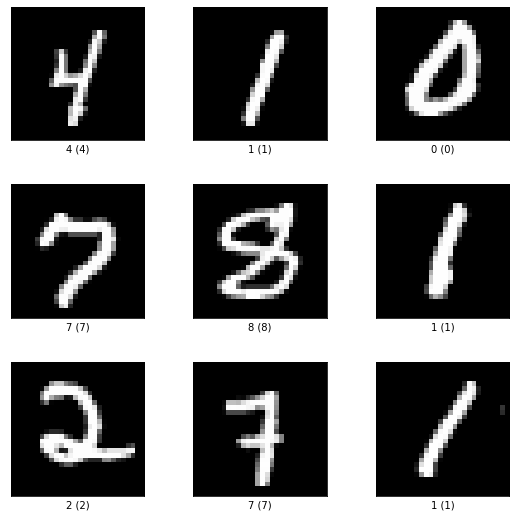

Figure(648x648)


In [ ]:
import tensorflow_datasets as tfd # data
from keras.models import Sequential # artificial neural network
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt # plotting
import warnings
warnings.filterwarnings("ignore")

dataset, batch_size = 'mnist', 2**6 
(train, test), info = tfd.load(dataset, split=['train', 'test'], as_supervised=True, with_info=True) # data
print("Number of classes: ", info.features["label"].num_classes)
print("\nClasses names: ", info.features["label"].names)
print("\nClasses examples: ")
print(tfd.show_examples(train, info))

## Model Architecture

In [ ]:
# deep learning variables
train_batch, test_batch = train.batch(batch_size=batch_size).cache().repeat(), test.batch(batch_size=batch_size).cache().repeat()
train_size, test_size = len(list(train)), len(list(test))
dim1, dim2, dim3, dims, nclasses = train.element_spec[0].shape[0], train.element_spec[0].shape[1], train.element_spec[0].shape[2], len(test.element_spec[0].shape), info.features['label'].num_classes
layer1, layer2, layer3, dropout_ratio, epochs = 2**5, 2**6, 2**7, 0.5, 10
padding, activationI, activationII, optimizer, metrics = 'same', 'relu', 'softmax', 'adam', 'accuracy'

# deep learning architecture
model = Sequential([
    Conv2D(layer1, (dims, dims), padding=padding, activation=activationI, input_shape=(dim1, dim2, dim3)),
    Conv2D(layer1, (dims, dims), padding=padding, activation=activationI),
    MaxPooling2D((dims-1, dims-1)),
    Conv2D(layer2, (dims, dims), padding=padding, activation=activationI, input_shape=(dim1, dim2, dim3)),
    Conv2D(layer2, (dims, dims), padding=padding, activation=activationI),
    MaxPooling2D((dims-1, dims-1)),
    Conv2D(layer3, (dims, dims), padding=padding, activation=activationI, input_shape=(dim1, dim2, dim3)),
    Conv2D(layer3, (dims, dims), padding=padding, activation=activationI),
    MaxPooling2D((dims-1, dims-1)),
    Flatten(),
    Dropout(dropout_ratio),
    Dense(layer3, activation=activationI),
    Dense(nclasses, activation=activationII)
])
model.compile(optimizer = optimizer, loss = SparseCategoricalCrossentropy(), metrics = [metrics])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

## Model Fitting

In [ ]:
history = model.fit(train_batch, epochs = epochs, steps_per_epoch = train_size, validation_data = test_batch, validation_steps = test_size)

Epoch 1/10
60000/60000 [==============================] - 426s 7ms/step - loss: 0.0239 - accuracy: 0.9935 - val_loss: 0.0469 - val_accuracy: 0.9936
Epoch 2/10
60000/60000 [==============================] - 420s 7ms/step - loss: 0.0189 - accuracy: 0.9965 - val_loss: 0.0598 - val_accuracy: 0.9930
Epoch 3/10
60000/60000 [==============================] - 419s 7ms/step - loss: 0.0249 - accuracy: 0.9962 - val_loss: 0.1069 - val_accuracy: 0.9926
Epoch 4/10
60000/60000 [==============================] - 419s 7ms/step - loss: 0.0468 - accuracy: 0.9926 - val_loss: 0.1514 - val_accuracy: 0.9888
Epoch 5/10
60000/60000 [==============================] - 418s 7ms/step - loss: 0.0718 - accuracy: 0.9876 - val_loss: 0.2433 - val_accuracy: 0.9872
Epoch 6/10
60000/60000 [==============================] - 416s 7ms/step - loss: 0.1681 - accuracy: 0.9670 - val_loss: 0.8358 - val_accuracy: 0.9799
Epoch 7/10
60000/60000 [==============================] - 417s 7ms/step - loss: 0.4135 - accuracy: 0.9051 - val_

## Model Evaluation

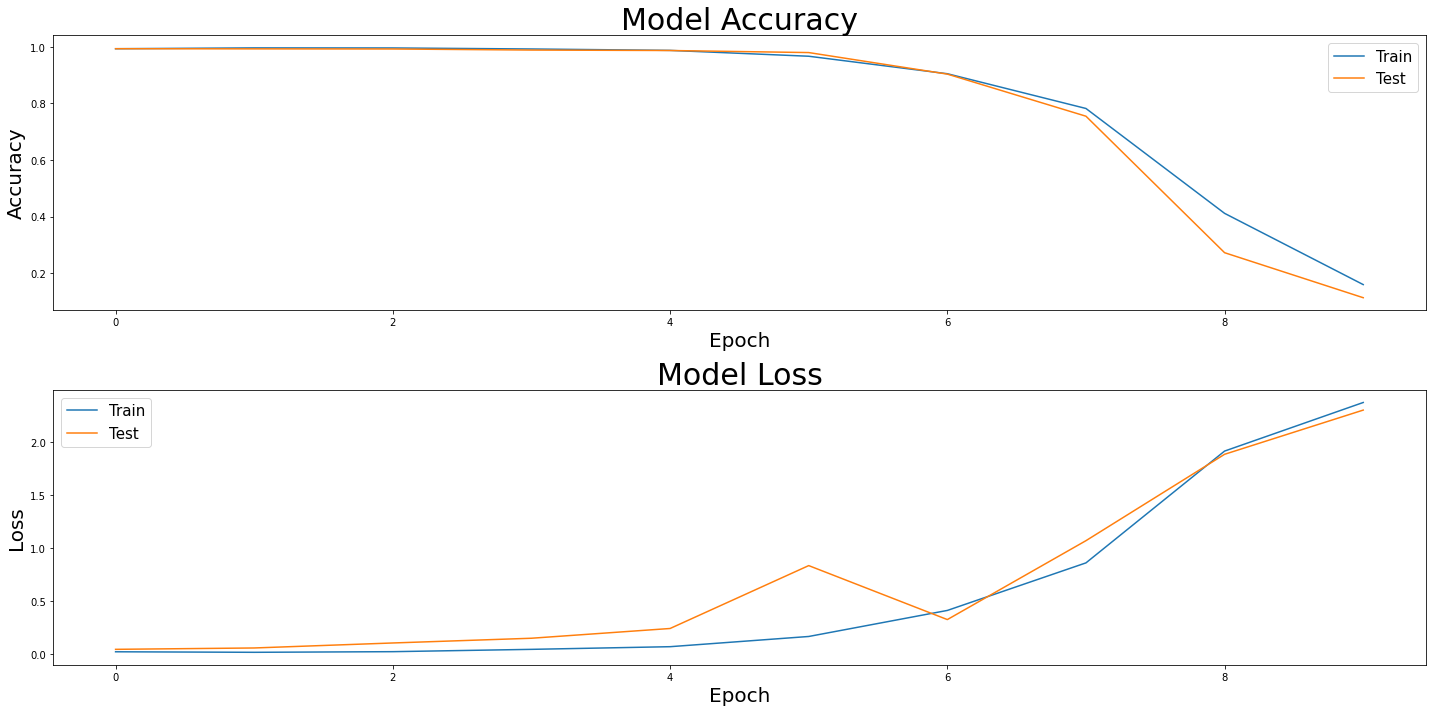

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy'.title(), fontsize=30)
plt.ylabel('accuracy'.title(), fontsize=20)
plt.xlabel('epoch'.title(), fontsize=20)
plt.legend(['train'.title(), 'test'.title()], loc=0, fontsize=15)

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss'.title(), fontsize=30)
plt.ylabel('loss'.title(), fontsize=20)
plt.xlabel('epoch'.title(), fontsize=20)
plt.legend(['train'.title(), 'test'.title()], loc=0, fontsize=15)

plt.tight_layout()
plt.show()

Here we can see that the model generalize and that after the third iteration start to decline in its performance. Therefore, three epochs are enough for this dataset.